**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier()

from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import accuracy_score

**IMPORTING DATASET**

In [3]:
data=pd.read_csv("/content/fraud_dataset.csv")
data


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,0
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1
2,1,1,0,1,1,3000,0,66,360,1,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,0,0,1,1,0,2872,1556,91,360,1,1,1,0
823,0,0,1,1,1,8596,0,162,360,1,1,2,0
824,1,0,1,1,1,3664,0,109,215,1,1,1,0
825,1,0,2,1,0,4921,0,162,360,0,1,2,0


**DATA EXPLORATION**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Gender                    827 non-null    int64
 1   Married                   827 non-null    int64
 2   Dependents                827 non-null    int64
 3   Education                 827 non-null    int64
 4   Self_Employed             827 non-null    int64
 5   ApplicantIncome           827 non-null    int64
 6   CoapplicantIncome         827 non-null    int64
 7   LoanAmount                827 non-null    int64
 8   Loan_Term                 827 non-null    int64
 9   Credit_History_Available  827 non-null    int64
 10  Housing                   827 non-null    int64
 11  Locality                  827 non-null    int64
 12  Fraud_Risk                827 non-null    int64
dtypes: int64(13)
memory usage: 84.1 KB


In [6]:
data.shape

(827, 13)

In [7]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
count,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000
mean,0.733978,0.481258,0.652963,0.790810,0.574365,5212.970979,1486.050786,140.892382,338.128174,0.885127,0.654172,1.978235,0.576784
std,0.442143,0.499951,0.935835,0.406976,0.494738,5593.713304,2802.847983,79.820451,75.353151,0.319062,0.475925,0.771471,0.494368
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,2894.500000,0.000000,100.000000,360.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,3752.000000,0.000000,125.000000,360.000000,1.000000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,5478.000000,2177.000000,156.500000,360.000000,1.000000,1.000000,3.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,3.000000,1.000000


In [45]:
a=data.groupby('Fraud_Risk').mean()
a

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing
Fraud_Risk,,,,,,,,,,
0,0.574286,0.000000,0.308571,0.177143,4779.974286,1092.642857,125.611429,346.685714,0.974286,0.700000
1,0.851153,0.834382,0.905660,0.865828,5530.683438,1774.714885,152.104822,331.849057,0.819706,0.620545


**DATA VISUALISATION**

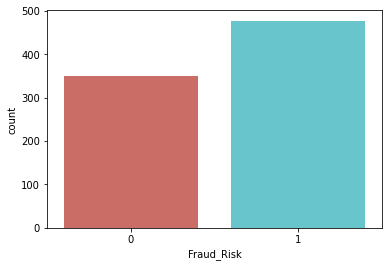

In [39]:
sns.countplot(x='Fraud_Risk',data=data, palette='hls')
plt.show()

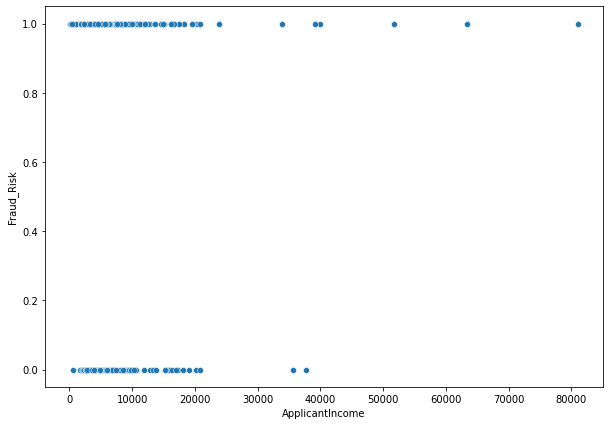

In [40]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="ApplicantIncome",y="Fraud_Risk",data=data)

**MISSING VALUES**

In [8]:
data.isna().sum()

Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Term                   0
Credit_History_Available    0
Housing                     0
Locality                    0
Fraud_Risk                  0
dtype: int64

**DATA CORRELATION**

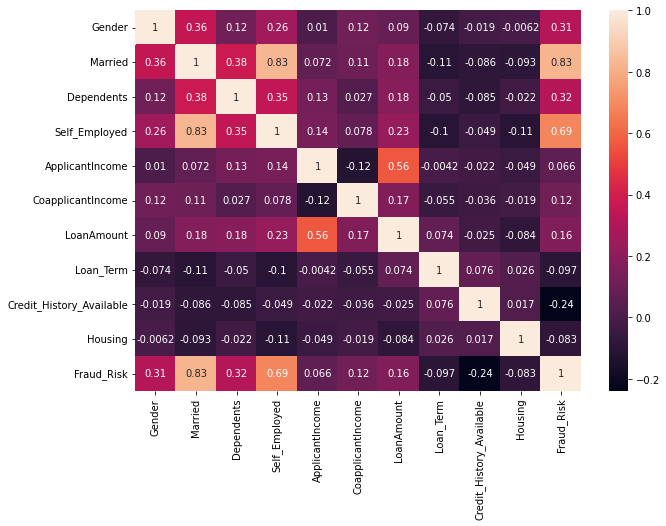

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

In [9]:
data.corr()["Fraud_Risk"]

Gender                      0.309570
Married                     0.825064
Dependents                  0.315421
Education                  -0.037406
Self_Employed               0.688170
ApplicantIncome             0.066347
CoapplicantIncome           0.120304
LoanAmount                  0.164087
Loan_Term                  -0.097339
Credit_History_Available   -0.239512
Housing                    -0.082534
Locality                   -0.030530
Fraud_Risk                  1.000000
Name: Fraud_Risk, dtype: float64

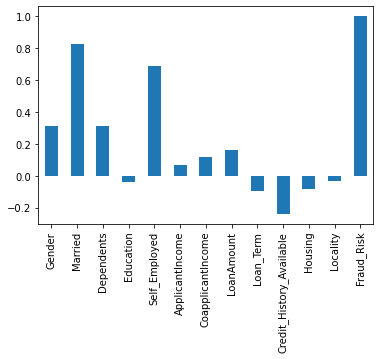

In [10]:
data.corr()['Fraud_Risk'].plot(kind = 'bar')
plt.show()

**REMOVING NEGATIVELY CORRELATED DATA**

In [11]:
data = data.drop(['Locality'],axis=1)

In [12]:
data=data.drop(['Education'],axis=1)

In [13]:
data.head(20)

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Fraud_Risk
0,1,0,0,0,5849,0,146,360,1,1,0
1,1,1,1,1,4583,1508,128,360,1,1,1
2,1,1,0,1,3000,0,66,360,1,1,1
3,1,1,0,1,2583,2358,120,360,1,1,1
4,1,0,0,0,6000,0,141,360,1,1,0
5,1,1,2,1,5417,4196,267,360,1,0,1
6,1,1,0,1,2333,1516,95,360,1,1,1
7,1,1,3,1,3036,2504,158,360,0,1,1
8,1,1,2,1,4006,1526,168,360,1,1,1
9,1,1,1,1,12841,10968,349,360,1,0,1


**OUTLIERS**

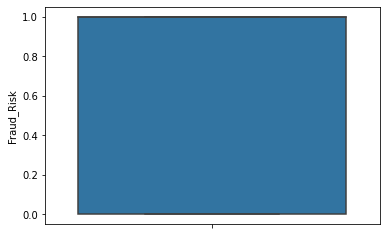

In [17]:
sns.boxplot(y=data['Fraud_Risk'])

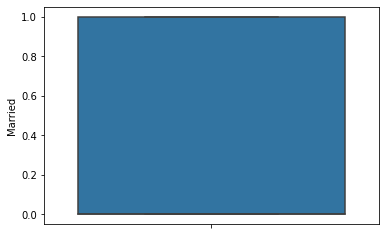

In [18]:
sns.boxplot(y=data['Married'])

**DATA SEPARTION AND MODEL LEARNING**

In [21]:
x = data.drop(columns=['Fraud_Risk'])
y = data['Fraud_Risk']
x

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing
0,1,0,0,0,5849,0,146,360,1,1
1,1,1,1,1,4583,1508,128,360,1,1
2,1,1,0,1,3000,0,66,360,1,1
3,1,1,0,1,2583,2358,120,360,1,1
4,1,0,0,0,6000,0,141,360,1,1
...,...,...,...,...,...,...,...,...,...,...
822,0,0,1,0,2872,1556,91,360,1,1
823,0,0,1,1,8596,0,162,360,1,1
824,1,0,1,1,3664,0,109,215,1,1
825,1,0,2,0,4921,0,162,360,0,1


APPLYING STANDARD SCALER

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x)

array([[ 0.60202842, -0.96319205, -0.69815472, ...,  0.29043326,
         0.36025189,  0.72708366],
       [ 0.60202842,  1.03821455,  0.37105631, ...,  0.29043326,
         0.36025189,  0.72708366],
       [ 0.60202842,  1.03821455, -0.69815472, ...,  0.29043326,
         0.36025189,  0.72708366],
       ...,
       [ 0.60202842, -0.96319205,  0.37105631, ..., -1.63500375,
         0.36025189,  0.72708366],
       [ 0.60202842, -0.96319205,  1.44026734, ...,  0.29043326,
        -2.77583558,  0.72708366],
       [ 0.60202842, -0.96319205, -0.69815472, ...,  0.29043326,
         0.36025189,  0.72708366]])

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)
y_train

16     0
267    1
578    1
596    1
599    1
      ..
534    0
584    1
493    0
527    1
168    1
Name: Fraud_Risk, Length: 578, dtype: int64

**LOGISTIC REGRESSION**

In [26]:
model_log=lr.fit(x_train,y_train)
pred_log=model_log.predict(x_test)
pred_log
accuracy_score(y_test,pred_log)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8795180722891566

**APPLYING SVC**

In [44]:
from sklearn.svm import SVC
model= SVC()
model.fit(x_train,y_train)
SVC()
train_predict_SVC= model.predict(x_train)
test_predict_SVC=model.predict(x_test)
Score_SVC_train=model.score(x_train,y_train)
Score_SVC_test=model.score(x_test,y_test)
print(Score_SVC_train)
print(Score_SVC_test)

0.6557093425605537
0.6506024096385542


**APPLYING RANDOM FOREST**

In [31]:
rfc=RandomForestClassifier(n_estimators=71)
model_rfc=rfc.fit(x_train,y_train)
pred_rfc=model_rfc.predict(x_test)
pred_rfc
accuracy_score(y_test,pred_rfc)




0.9196787148594378

**APPLYING CONFUSION MATRIX**

In [42]:
y_train_pred = rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       106
           1       1.00      0.86      0.92       143

    accuracy                           0.92       249
   macro avg       0.92      0.93      0.92       249
weighted avg       0.93      0.92      0.92       249



In [43]:
from sklearn.metrics import confusion_matrix
conf_matix = confusion_matrix(y_test,y_test_pred)
conf_matix

array([[106,   0],
       [ 20, 123]])

*CONCLUSION-WE ARE GETTING THE BEST ACCURACY FROM RANDOM FOREST*